# Импортирование библиотек

In [1]:
!python -m spacy download ru_core_news_sm &>/dev/null

In [1]:
import os
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import missingno as msno
%matplotlib inline
sns.set_theme(style="whitegrid")
import re
from sklearn.preprocessing import LabelEncoder

import spacy
from tqdm import tqdm
from wordcloud import WordCloud
from nltk.corpus import stopwords
from collections import Counter

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Подключение к гугл диску
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Загрузка таблиц

In [2]:
df = pd.read_csv('/content/drive/MyDrive/ИТМО/Предсказание вакансии/vacancy_9.csv', sep='|')

<ipython-input-2-3a6a668d2348>:1: DtypeWarning: Columns (1,3,14,16,24,25,33,41,44,56,63,69) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/ИТМО/Предсказание вакансии/vacancy_9.csv', sep='|')


In [5]:
# Общий размер таблицы
print(df.shape)

(147469, 78)


In [6]:
# Первые 5 строк таблицы
df.head()

,id,academic_degree,accommodation_capability,accommodation_type,additional_premium,additional_requirements,bonus_type,measure_type,busy_type,career_perspective,...,federalDistrictCode,industryBranchName,contactList,company_name,full_company_name,company_inn,company,languageKnowledge,hardSkills,softSkills
0,47a49650-ab9c-11ed-8f68-c915d4ea89c1,NaN,False,NaN,NaN,NaN,NaN,NaN,Полная занятость,False,...,1,NaN,NaN,NaN,"ЗАО ""УграКерам""",4.001007e+09,"{""companycode"":""1084001001700"",""email"":""elena....",[],[],[]
1,479fb085-82c5-11ee-bf4e-e7d0d2cf29b1,NaN,False,NaN,NaN,NaN,NaN,NaN,Полная занятость,False,...,1,NaN,NaN,NaN,МУНИЦИПАЛЬНОЕ БЮДЖЕТНОЕ ОБЩЕОБРАЗОВАТЕЛЬНОЕ УЧ...,5.077011e+09,"{""companycode"":""1025007772800"",""email"":""lipicy...",[],[],[]
2,479c2a95-4e6e-11ee-a42c-3d3a7b5fc4bc,NaN,False,NaN,NaN,<ul> <li>График работы 2/2 (дневные смены)</li...,NaN,NaN,Полная занятость,True,...,1,NaN,NaN,NaN,"ОБЩЕСТВО С ОГРАНИЧЕННОЙ ОТВЕТСТВЕННОСТЬЮ ""ГРУП...",5.029015e+09,"{""companycode"":""1025003531662"",""email"":""teplol...",[],[],[]
3,478dc372-03aa-11ed-bddd-bf2cfe8c828d,NaN,False,NaN,NaN,Квотируемое рабочее место<br/>детское питание<...,NaN,NaN,Полная занятость,False,...,1,NaN,NaN,NaN,МУНИЦИПАЛЬНОЕ БЮДЖЕТНОЕ ДОШКОЛЬНОЕ ОБРАЗОВАТЕЛ...,4.026009e+09,"{""companycode"":""1024001339933"",""email"":""dou_15...",[],[],[]
4,478a4875-8230-11ee-b2cf-cb26dff57dd7,NaN,False,NaN,NaN,NaN,NaN,NaN,Полная занятость,True,...,1,NaN,NaN,NaN,"МУНИЦИПАЛЬНОЕ КАЗЕННОЕ УЧРЕЖДЕНИЕ ""МОНИТОРИНГ ...",5.040138e+09,"{""companycode"":""1155040007737"",""email"":""munkon...",[],[],[]


## Общая информация

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147469 entries, 0 to 147468
Data columns (total 78 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   id                               147469 non-null  object 
 1   academic_degree                  91 non-null      object 
 2   accommodation_capability         147469 non-null  bool   
 3   accommodation_type               6767 non-null    object 
 4   additional_premium               17916 non-null   float64
 5   additional_requirements          62697 non-null   object 
 6   bonus_type                       18012 non-null   object 
 7   measure_type                     17786 non-null   object 
 8   busy_type                        147469 non-null  object 
 9   career_perspective               147469 non-null  bool   
 10  change_time                      140519 non-null  object 
 11  code_external_system             41455 non-null   object 
 12  co

In [8]:
# Описательная статистика по каждому столбцу
pd.set_option('display.float_format', lambda x:'%.3f'%x)
df.describe(include='all')

,id,academic_degree,accommodation_capability,accommodation_type,additional_premium,additional_requirements,bonus_type,measure_type,busy_type,career_perspective,...,federalDistrictCode,industryBranchName,contactList,company_name,full_company_name,company_inn,company,languageKnowledge,hardSkills,softSkills
count,147469,91,147469,6767,17916.000,62697,18012,17786,147469,147469,...,147469.000,725,0.000,0.000,144348,147433.000,147469,147469,147469,147469
unique,147469,2,2,4,NaN,38516,3,2,6,2,...,NaN,11,NaN,NaN,27011,NaN,27764,6995,9612,5032
top,47a49650-ab9c-11ed-8f68-c915d4ea89c1,Кандидат наук,False,DORMITORY,NaN,Ответственность,MONTHLY,PERCENT,Полная занятость,False,...,NaN,Авиационная промышленность,NaN,NaN,Азбука вкуса,NaN,"{""companycode"":""5147746474134"",""hr-agency"":fal...",[],[],[]
freq,1,74,139243,4696,NaN,3656,13216,13922,139096,142998,...,NaN,189,NaN,NaN,2142,NaN,3121,140475,137858,142438
mean,NaN,NaN,NaN,NaN,3207.145,NaN,NaN,NaN,NaN,NaN,...,1.000,NaN,NaN,NaN,NaN,19633045044.815,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,13269.756,NaN,NaN,NaN,NaN,NaN,...,0.000,NaN,NaN,NaN,NaN,86675279860.069,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,...,1.000,NaN,NaN,NaN,NaN,273008320.000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,25.000,NaN,NaN,NaN,NaN,NaN,...,1.000,NaN,NaN,NaN,NaN,4028001072.000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,50.000,NaN,NaN,NaN,NaN,NaN,...,1.000,NaN,NaN,NaN,NaN,6234098539.000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,100.000,NaN,NaN,NaN,NaN,NaN,...,1.000,NaN,NaN,NaN,NaN,7702319337.000,NaN,NaN,NaN,NaN


## Кол-во пропусков

In [9]:
# Список всех столбцов
list_columns = list(df.columns)

In [10]:
for num, column in enumerate(list_columns):
  print(num, ': ', df[f'{column}'].isna().sum())

0 :  0
1 :  147378
2 :  0
3 :  140702
4 :  129553
5 :  84772
6 :  129457
7 :  129683
8 :  0
9 :  0
10 :  6950
11 :  106014
12 :  17629
13 :  0
14 :  0
15 :  26
16 :  121256
17 :  0
18 :  0
19 :  0
20 :  0
21 :  0
22 :  130386
23 :  147469
24 :  140016
25 :  115215
26 :  0
27 :  0
28 :  0
29 :  105616
30 :  147469
31 :  135479
32 :  0
33 :  106126
34 :  13782
35 :  4242
36 :  3
37 :  0
38 :  85
39 :  147469
40 :  0
41 :  140610
42 :  0
43 :  5070
44 :  141785
45 :  147469
46 :  0
47 :  146976
48 :  1871
49 :  1871
50 :  3026
51 :  0
52 :  138849
53 :  0
54 :  0
55 :  0
56 :  142791
57 :  76318
58 :  85
59 :  0
60 :  32116
61 :  566
62 :  566
63 :  142926
64 :  6
65 :  0
66 :  0
67 :  0
68 :  0
69 :  146744
70 :  147469
71 :  147469
72 :  3121
73 :  36
74 :  0
75 :  0
76 :  0
77 :  0


In [11]:
# Посчитаем какую часть составляют пропуски от общего количества элементов
for num, column in enumerate(list_columns):
  print(num, ': ', round(df[f'{column}'].isna().sum() / df.shape[0], 4))

0 :  0.0
1 :  0.9994
2 :  0.0
3 :  0.9541
4 :  0.8785
5 :  0.5748
6 :  0.8779
7 :  0.8794
8 :  0.0
9 :  0.0
10 :  0.0471
11 :  0.7189
12 :  0.1195
13 :  0.0
14 :  0.0
15 :  0.0002
16 :  0.8222
17 :  0.0
18 :  0.0
19 :  0.0
20 :  0.0
21 :  0.0
22 :  0.8842
23 :  1.0
24 :  0.9495
25 :  0.7813
26 :  0.0
27 :  0.0
28 :  0.0
29 :  0.7162
30 :  1.0
31 :  0.9187
32 :  0.0
33 :  0.7196
34 :  0.0935
35 :  0.0288
36 :  0.0
37 :  0.0
38 :  0.0006
39 :  1.0
40 :  0.0
41 :  0.9535
42 :  0.0
43 :  0.0344
44 :  0.9615
45 :  1.0
46 :  0.0
47 :  0.9967
48 :  0.0127
49 :  0.0127
50 :  0.0205
51 :  0.0
52 :  0.9415
53 :  0.0
54 :  0.0
55 :  0.0
56 :  0.9683
57 :  0.5175
58 :  0.0006
59 :  0.0
60 :  0.2178
61 :  0.0038
62 :  0.0038
63 :  0.9692
64 :  0.0
65 :  0.0
66 :  0.0
67 :  0.0
68 :  0.0
69 :  0.9951
70 :  1.0
71 :  1.0
72 :  0.0212
73 :  0.0002
74 :  0.0
75 :  0.0
76 :  0.0
77 :  0.0


In [12]:
# Пример первой строчки с общим кол-вом пропусков
n = 0
for column_name, value in df.iloc[0].items():
    print(f"{n} : {column_name} - {value} - {round(df[f'{column_name}'].isna().sum() / df.shape[0], 4)}")
    n += 1

0 : id - 47a49650-ab9c-11ed-8f68-c915d4ea89c1 - 0.0
1 : academic_degree - nan - 0.9994
2 : accommodation_capability - False - 0.0
3 : accommodation_type - nan - 0.9541
4 : additional_premium - nan - 0.8785
5 : additional_requirements - nan - 0.5748
6 : bonus_type - nan - 0.8779
7 : measure_type - nan - 0.8794
8 : busy_type - Полная занятость - 0.0
9 : career_perspective - False - 0.0
10 : change_time - 2023-02-13T16:18:01+0300 - 0.0471
11 : code_external_system - nan - 0.7189
12 : code_profession - 273287.0 - 0.1195
13 : code_professional_sphere - Medicine - 0.0
14 : company_code - 1084001001700 - 0.0
15 : contact_person - Короткова Елена Петровна - 0.0002
16 : contact_source - nan - 0.8222
17 : data_ids - ["47a46f43-ab9c-11ed-8f68-c915d4ea89c1","47a46f42-ab9c-11ed-8f68-c915d4ea89c1","47a46f41-ab9c-11ed-8f68-c915d4ea89c1","47a46f40-ab9c-11ed-8f68-c915d4ea89c1","47a46f44-ab9c-11ed-8f68-c915d4ea89c1"] - 0.0
18 : date_create - 2023-02-13T15:45:22+0300 - 0.0
19 : date_modify - 2023-11-14T1

### Визуализация таблицы на пропуски

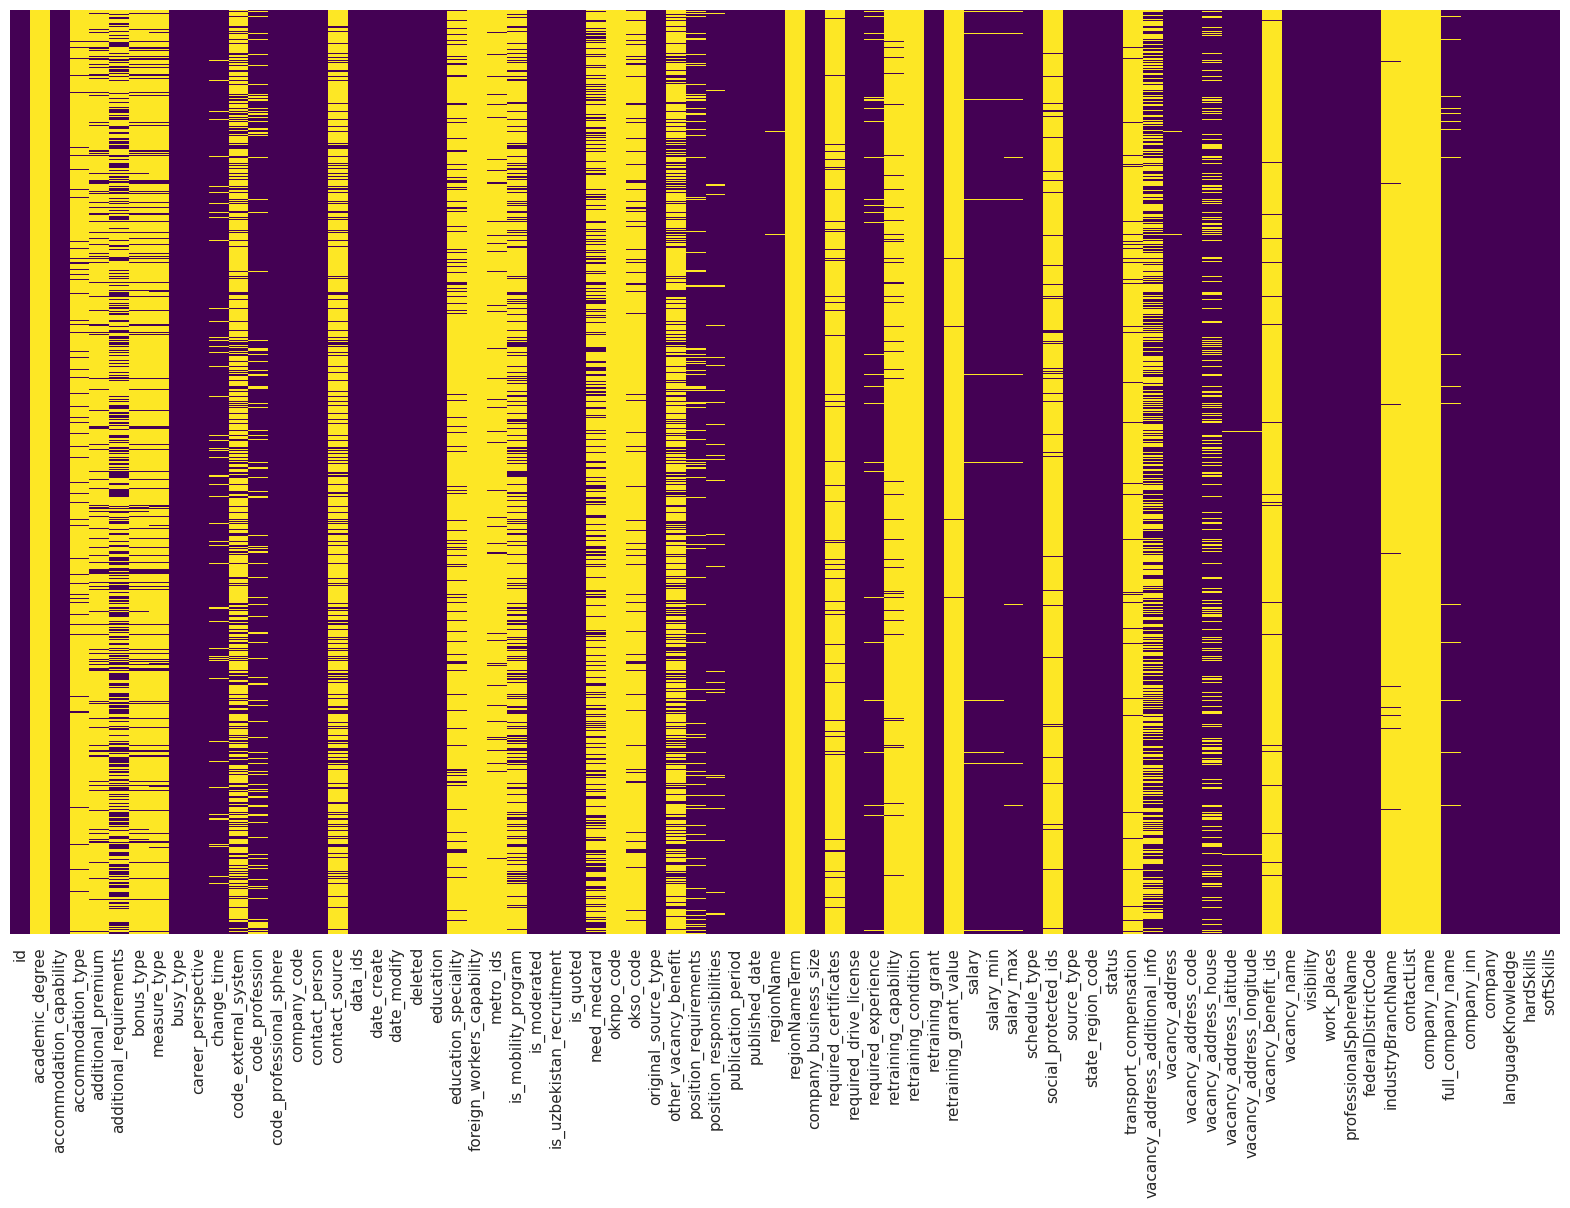

In [13]:
# Визуализация таблицы на пропуски
fig, ax = plt.subplots(figsize=(20,12)) # Создаем область под график
sns_heatmap = sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis') # Визуализируем прпуски
plt.show() # Отображаем график

## Удаление столбцов

In [14]:
# Вычисляем порог для удаления столбцов
threshold = 0.5
threshold_value = int(threshold * len(df))

# Удаляем столбцы, в которых количество пропусков больше порогового значения
df = df.dropna(axis=1, thresh=threshold_value)

In [15]:
df.shape

(147469, 50)

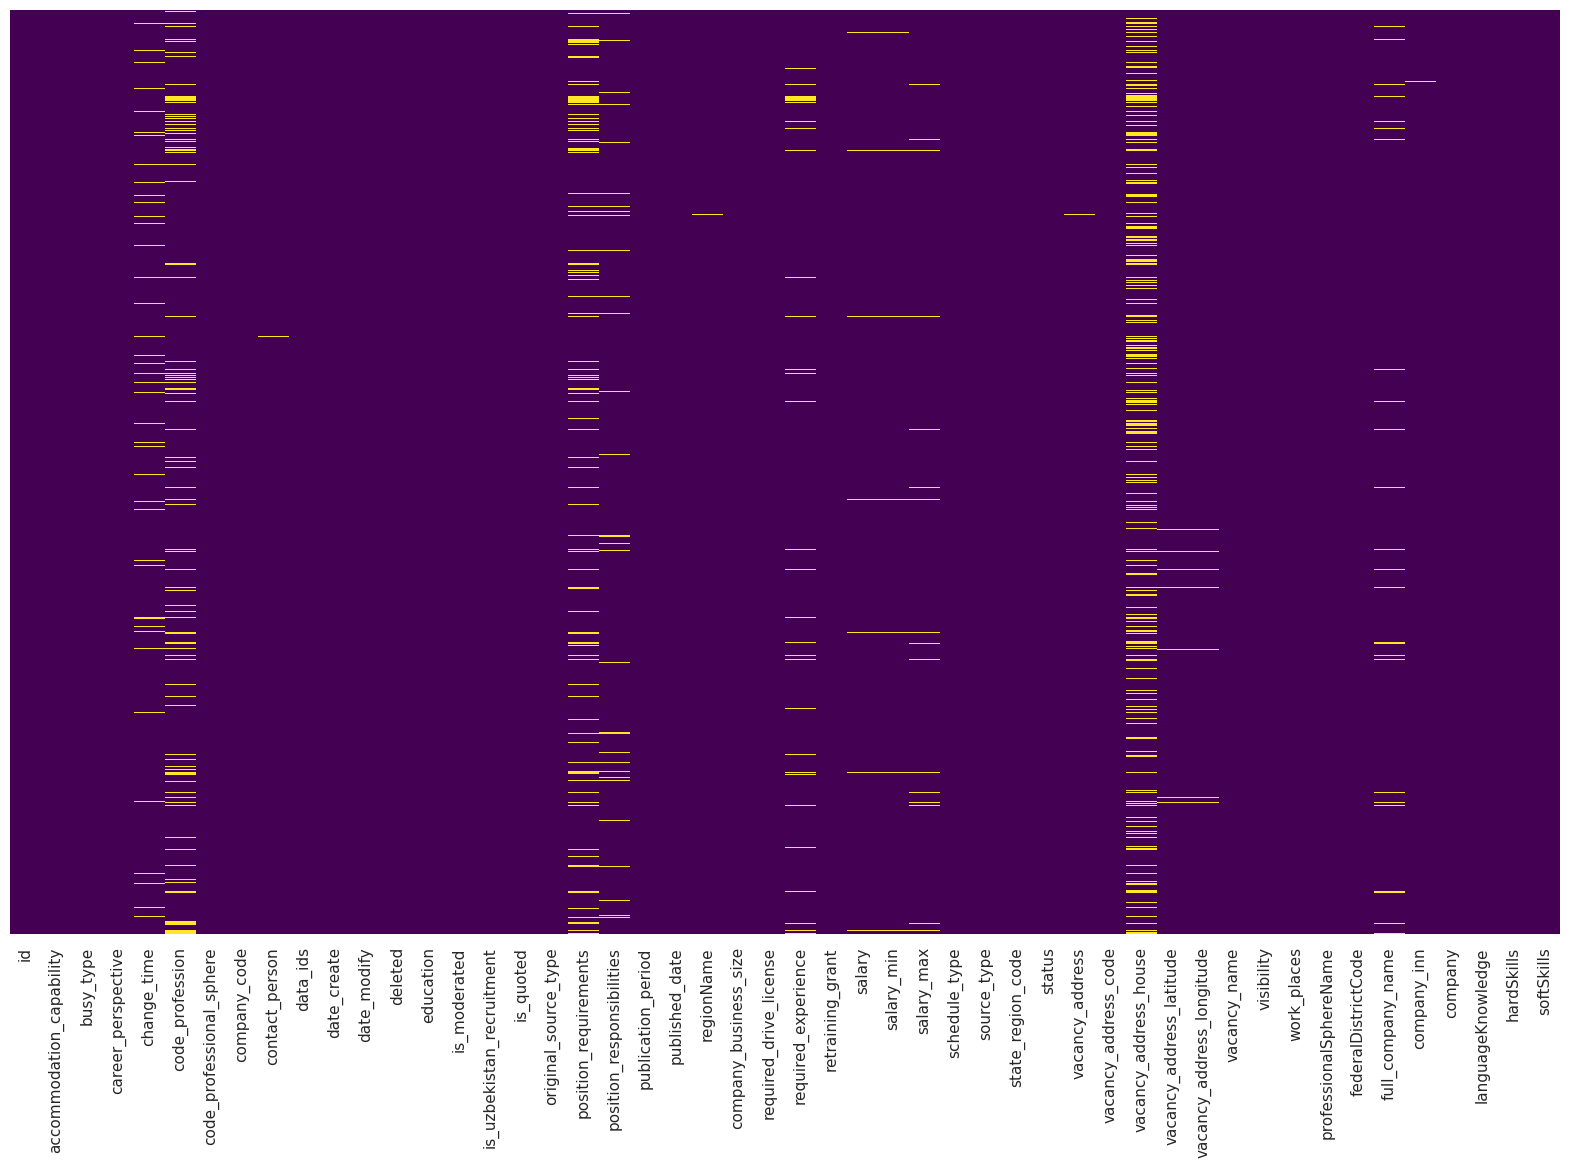

In [16]:
# Визуализация таблицы на пропуски
fig, ax = plt.subplots(figsize=(20,12)) # Создаем область под график
sns_heatmap = sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis') # Визуализируем прпуски
plt.show() # Отображаем график

In [17]:
# Список столбцов которые оставлись
list_columns = list(df.columns)

In [18]:
# Пример первой строчки с общим кол-вом пропусков
n = 0
for column_name, value in df.iloc[100].items():
    print(f"{n} : {column_name} - {value}")
    n += 1

0 : id - 2ef57b02-8248-11ee-a2a9-3950de1bc4b3
1 : accommodation_capability - False
2 : busy_type - Полная занятость
3 : career_perspective - False
4 : change_time - 2023-11-13T20:15:03+0300
5 : code_profession - nan
6 : code_professional_sphere - Sales
7 : company_code - 1027700404797
8 : contact_person - Мария Лущенкова
9 : data_ids - ["2ef57b00-8248-11ee-a2a9-3950de1bc4b3","2ef57b01-8248-11ee-a2a9-3950de1bc4b3"]
10 : date_create - 2023-11-13T20:15:03+0300
11 : date_modify - 2023-11-13T20:15:03+0300
12 : deleted - False
13 : education - Не указано
14 : is_moderated - True
15 : is_uzbekistan_recruitment - False
16 : is_quoted - False
17 : original_source_type - INTERNET_RESOURCE
18 : position_requirements - nan
19 : position_responsibilities - <br/>Обязанности:<ul><li>Работа в торговом зале без кассы</li><li>Выкладка товара</li><li>Контроль сроков годности и ценников</li><li>Работа с покупателями</li></ul><br />Условия:<ul><li>Оформление по ТК РФ с первого дня</li><li>Полностью белая з

## Удаление неиформативных столбцов

In [19]:
# Список столбцов для удаления
columns_to_remove = ['id',
                      'accommodation_capability',
                      'career_perspective',
                      'change_time',
                      'code_profession',
                      'code_professional_sphere',
                      'company_code',
                      'contact_person',
                      'data_ids',
                      'date_create',
                      'date_modify',
                      'deleted',
                      'federalDistrictCode',
                      'is_moderated',
                      'is_uzbekistan_recruitment',
                      'is_quoted',
                      'original_source_type',
                      'publication_period',
                      'published_date',
                      'company_business_size',
                      'retraining_grant',
                      'status',
                      'vacancy_address_code',
                      'vacancy_address_house',
                      'vacancy_address_latitude',
                      'vacancy_address_longitude',
                      'source_type',
                      'salary',
                      'visibility',
                      'work_places',
                      'full_company_name',
                      'company_inn',
                      'company']


# Удаляем столбцы
df = df.drop(columns=columns_to_remove)

# Размер таблицы после удаления
print(df.shape)

(147469, 17)


# **Корреляция данных**

## Посмотрим на разные графики корреляции

In [20]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,required_experience,salary_min,salary_max,state_region_code
required_experience,1.000,0.242,0.147,0.108
salary_min,0.242,1.000,0.548,0.197
salary_max,0.147,0.548,1.000,0.176
state_region_code,0.108,0.197,0.176,1.000


### Визуализация графика корреляции

<Axes: >

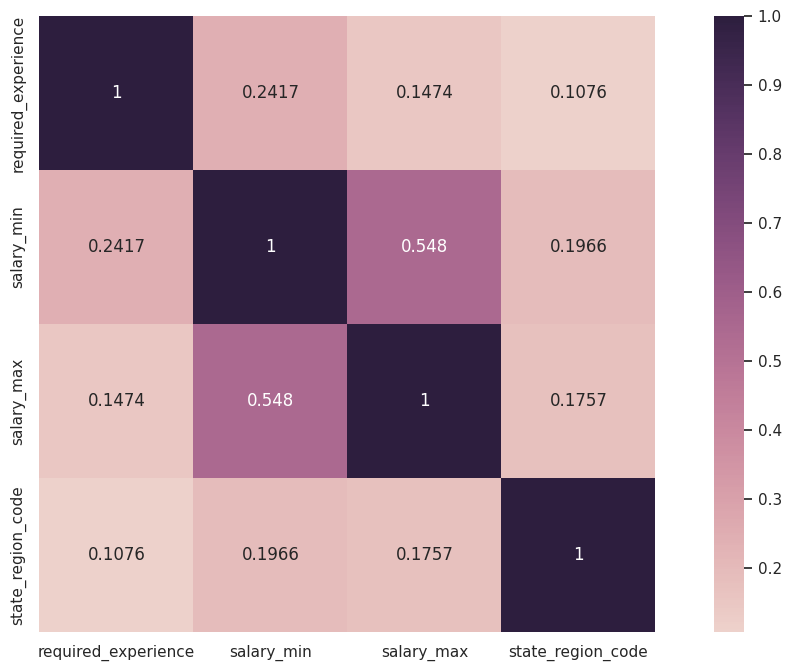

In [21]:
plt.subplots(figsize=(15,8))
fig=sns.heatmap(corr_matrix, annot=True, square=True, cmap=sns.cubehelix_palette(as_cmap=True), fmt='.4g')
fig

## **Графики**

### **Общие основные графики**

array([[<Axes: title={'center': 'required_experience'}>,
        <Axes: title={'center': 'salary_min'}>],
       [<Axes: title={'center': 'salary_max'}>,
        <Axes: title={'center': 'state_region_code'}>]], dtype=object)

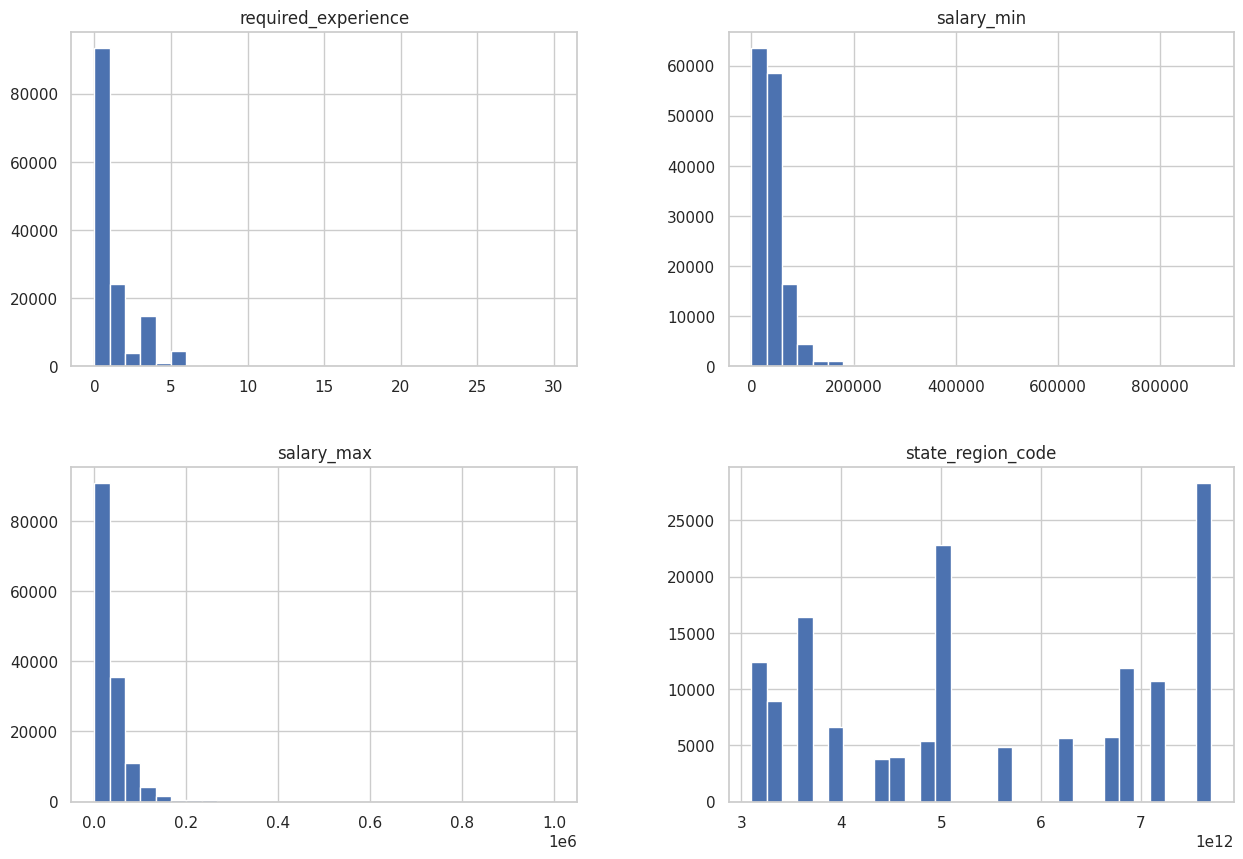

In [22]:
df.hist(bins=30, figsize=(15, 10))

# **Разбор каждого столбца**

## 1. **Вакансии** - vacancy_name

In [23]:
df['vacancy_name'].describe()

count                                             147463
unique                                             40276
top       Уборщик производственных и служебных помещений
freq                                                1456
Name: vacancy_name, dtype: object

40277 - уникальных вакансий

In [24]:
df['vacancy_name'].value_counts()

Уборщик производственных и служебных помещений    1456
Повар                                             1445
Водитель автомобиля                               1266
Продавец-кассир                                   1185
Подсобный рабочий                                 1138
                                                  ... 
водитель автомобиля специально                       1
Бригадир смены грузчиков-комплектовщиков             1
раскройщик ирс 2023                                  1
Ветеринарный врач (Гагаринский филиал)               1
подсобный рабочий (5)                                1
Name: vacancy_name, Length: 40276, dtype: int64

In [3]:
# Замена всех пустых значений
df['vacancy_name'] = df['vacancy_name'].fillna('Не задано')

### 30 самых популярный вакансий

In [25]:
# Посмотрим на 30 самых популярный вакансий
top30_profs = df['vacancy_name'].value_counts(dropna=False).nlargest(30)
top30_profs

Уборщик производственных и служебных помещений                  1456
Повар                                                           1445
Водитель автомобиля                                             1266
Продавец-кассир                                                 1185
Подсобный рабочий                                               1138
Дворник                                                         1092
Грузчик                                                         1078
Бухгалтер                                                       1052
Медицинская сестра                                               897
Швея                                                             866
Полицейский / Полицейский-водитель                               827
Кладовщик                                                        756
Электромонтер по ремонту и обслуживанию электрооборудования      651
Слесарь-ремонтник                                                641
Электрогазосварщик                

### Вакансии по **регионам**

In [26]:
df.groupby('regionName', as_index=False).busy_type.count()

,regionName,busy_type
0,Белгородская область,6930
1,Боровлево-1 промышленная зона,5
2,Боровлево-2 промышленная зона,8
3,Брянская область,5505
4,Владимирская область,8956
5,Воронежская область,9777
6,Город Москва,20409
7,Ивановская область,6621
8,Калужская область,6668
9,Костромская область,3753


### **Визуализация данных по вакансиям**

In [ ]:
nlp = spacy.load("ru_core_news_sm")
russian_stopwords = stopwords.words('russian')

In [ ]:
custom_position_lemmas = []
for i in tqdm(df['vacancy_name']):
    doc = nlp(str(i))
    lemmas = [token.lemma_ for token in doc if (token.text.isalpha() and token.text not in russian_stopwords)]
    custom_position_lemmas.extend(lemmas)

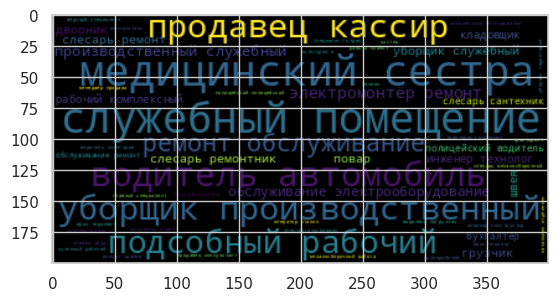

In [ ]:
wordcloud = WordCloud(stopwords=russian_stopwords).generate(' '.join(custom_position_lemmas))
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

In [ ]:
c = Counter(custom_position_lemmas)
common_positions = dict(c.most_common(5))
common_positions_names = list(common_positions.keys())
common_positions_count = list(common_positions.values())

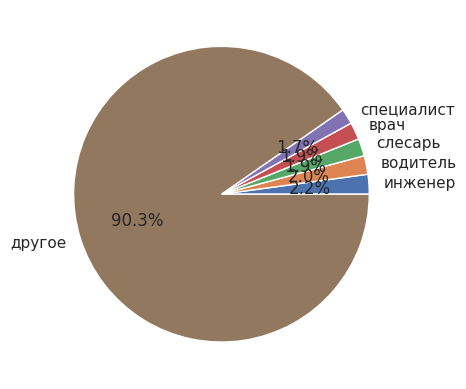

In [ ]:
plt.pie(common_positions_count + [len(custom_position_lemmas) - sum(common_positions_count)],
        labels=common_positions_names + ['другое'],
        autopct='%1.1f%%')
plt.show()

## 2. **Зарплата** - salary_min

In [113]:
# Распределение зарплаты от
print(df['salary_min'].describe())


count   145598.000
mean     37947.252
std      26526.035
min          0.000
25%      20000.000
50%      30400.000
75%      49300.000
max     900000.000
Name: salary_min, dtype: float64


In [114]:
# Распределение зарплаты до
print(df['salary_max'].describe())

count    144443.000
mean      29908.062
std       37708.678
min           0.000
25%           0.000
50%       21711.000
75%       45000.000
max     1000000.000
Name: salary_max, dtype: float64


In [115]:
# Подсчитаем разницу в зарплате от и до
df['salary_diff'] = df['salary_min'] - df['salary_max']

In [116]:
# Самые большие зарплаты от
df[['vacancy_name','salary_min']].sort_values(by='salary_min', ascending=False).head(20)

,vacancy_name,salary_min
4167,Начальник охраны,900000.000
144253,Директор по клиентскому опыту и медиа,558000.000
14133,Директор по развитию (74062),539999.000
76006,Машинист конвейера,539000.000
19787,Программист 1С,504000.000
77540,Начальник управления продуктов эквайринговых с...,500000.000
105137,Врач-онколог,450000.000
48552,вице-президент,420000.000
105413,Врач-офтальмохирург (катарактальный и витреоре...,400000.000
76411,начальник управления по импортозамещению,400000.000


In [117]:
# Самые большие зарплаты с учетом разницы от и до
df[['vacancy_name','salary_diff']].sort_values(by='salary_diff', ascending=False).head(20)

,vacancy_name,salary_diff
14133,Директор по развитию (74062),539999.000
76006,Машинист конвейера,539000.000
105137,Врач-онколог,450000.000
76411,начальник управления по импортозамещению,400000.000
13784,Заместитель начальника отдела (82318),346190.000
139866,Ведущий инженер по надзору за строительством (...,344680.000
48243,Главный специалист по информационной безопасности,340000.000
139547,Ведущий инженер по комплектации оборудования и...,321702.000
127847,Руководитель проектов по разработке инвестицио...,313000.000
127669,Руководитель направления внутреннего аудита,308900.000


### Зарплата по ТОП 30 професиям

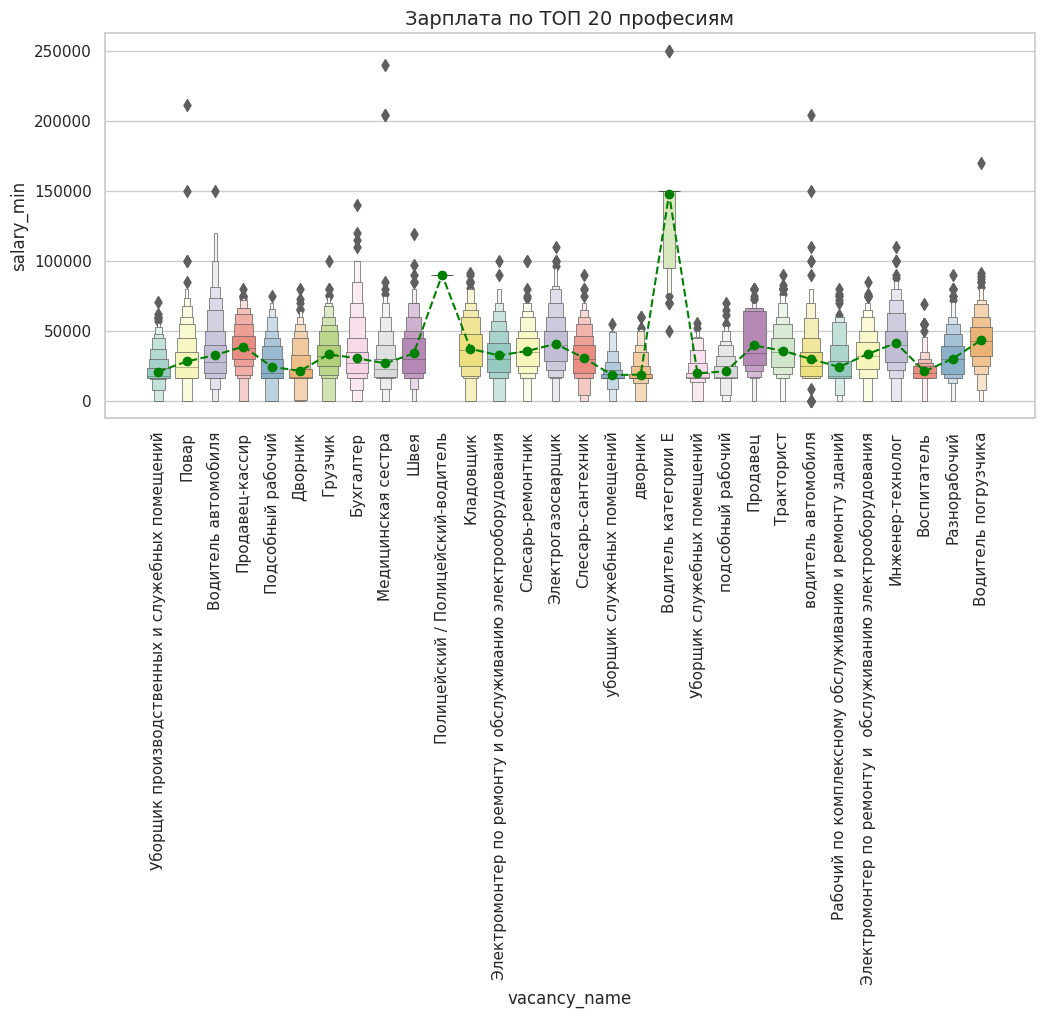

In [118]:
_df = df[df['vacancy_name'].isin(top30_profs.index)]
profession_ranking = list(top30_profs.index)

f, ax = plt.subplots(figsize=(12,5))
ax = sns.boxenplot(x="vacancy_name", y="salary_min",
              color="gray",  palette="Set3", order=profession_ranking,
              scale="linear", data=_df, linewidth=0.5)

ax.tick_params(axis='x', rotation=90)
ax.set_title("Зарплата по ТОП 20 професиям", fontsize=14)

means = _df.groupby("vacancy_name")["salary_min"].mean().loc[profession_ranking]
_ = plt.plot(range(len(profession_ranking)), means, marker="o", color="green", markersize=6, linestyle="--")

### **Средняя зарплата по городам**


г. Москва: 75000
Город Москва: 63910
Боровлево-1 промышленная зона: 58600
Московская область: 51119
Боровлево-2 промышленная зона: 50625
Тульская область: 35054
Калужская область: 33825
Владимирская область: 32935
Липецкая область: 32184
Белгородская область: 32037

Топ-10 регионов с самыми маленькими зарплатами:
Рязанская область: 30221
Воронежская область: 29770
Ярославская область: 29591
Курская область: 29174
Брянская область: 28044
Костромская область: 27905
Смоленская область: 27068
Орловская область: 26818
Ивановская область: 26548
Тамбовская область: 24584


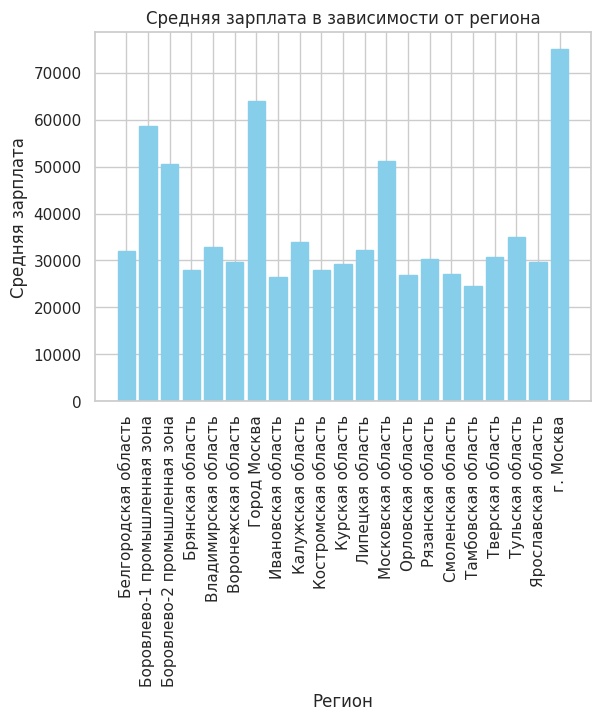

In [119]:
grouped_df = df.groupby('regionName')['salary_min'].mean()

# Выводим топ-10 городов с самыми большими зарплатами
for region_id, avg_salary in grouped_df.sort_values(ascending=False).head(10).items():
    print(f"{region_id}: {round(avg_salary)}")

# Выводим топ-10 городов с самыми маленькими зарплатами
print("\nТоп-10 регионов с самыми маленькими зарплатами:")
for region_id, avg_salary in grouped_df.sort_values(ascending=False).tail(10).items():
    print(f"{region_id}: {round(avg_salary)}")

# Построение графика
plt.bar(grouped_df.index, grouped_df.values, color = 'skyblue', edgecolor = 'skyblue', linewidth=1)
plt.xlabel('Регион')
plt.ylabel('Средняя зарплата')
plt.title('Средняя зарплата в зависимости от региона')
plt.xticks(rotation=90)
plt.show()

### **Взамосвязи между столбцами**

#### График работы и зарплатой

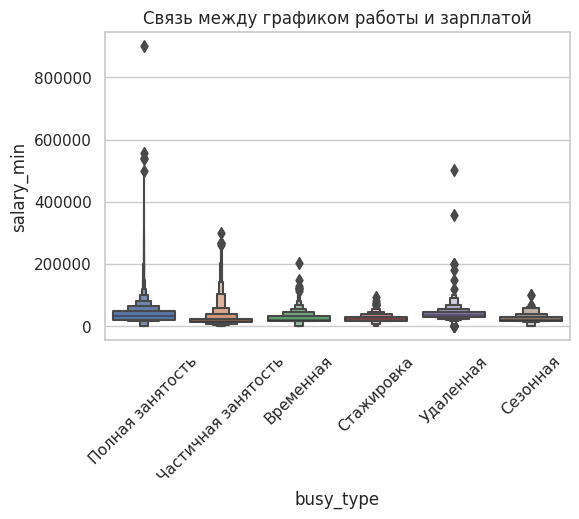

In [120]:
plt.figure(figsize=(6, 4))
sns.boxenplot(x='busy_type', y='salary_min', data=df)
plt.title('Связь между графиком работы и зарплатой')
plt.xticks(rotation=45)
plt.show()

#### Распределение **заработной платы** от и до

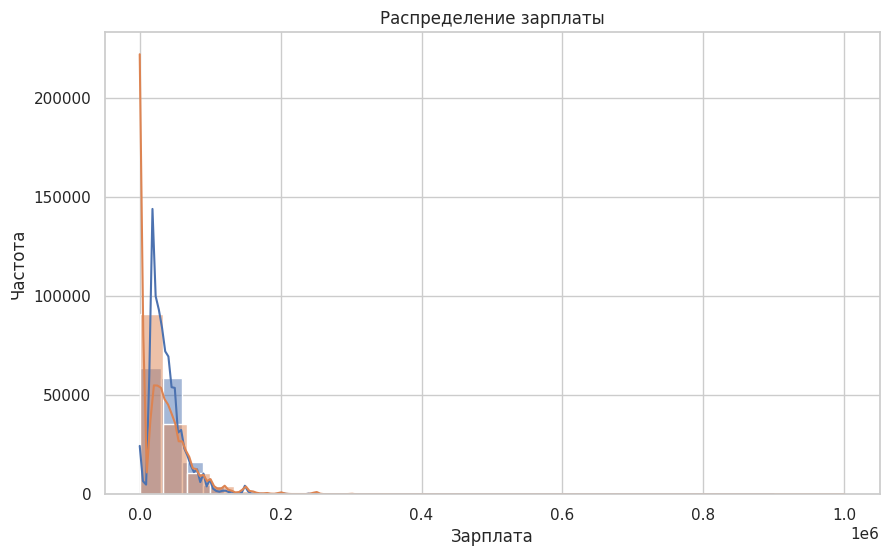

In [121]:
plt.figure(figsize=(10, 6))
sns.histplot(df['salary_min'], bins=30, kde=True)
sns.histplot(df['salary_max'], bins=30, kde=True)
plt.title('Распределение зарплаты')
plt.xlabel('Зарплата')
plt.ylabel('Частота')
plt.show()

### **Вывод:**

Одни из самых высоких зарплат характерны для типа занятости "Полная занятость".

## 3. **Тип занятости** - busy_type и schedule_type

In [122]:
df['busy_type'].value_counts()

Полная занятость       139096
Частичная занятость      3670
Временная                3432
Удаленная                 494
Стажировка                436
Сезонная                  341
Name: busy_type, dtype: int64

In [123]:
df['schedule_type'].value_counts()

Полный рабочий день             103120
Сменный график                   30514
Неполный рабочий день             5912
Гибкий график                     3324
Вахтовый метод                    2823
Ненормированный рабочий день      1776
Name: schedule_type, dtype: int64

### Графики

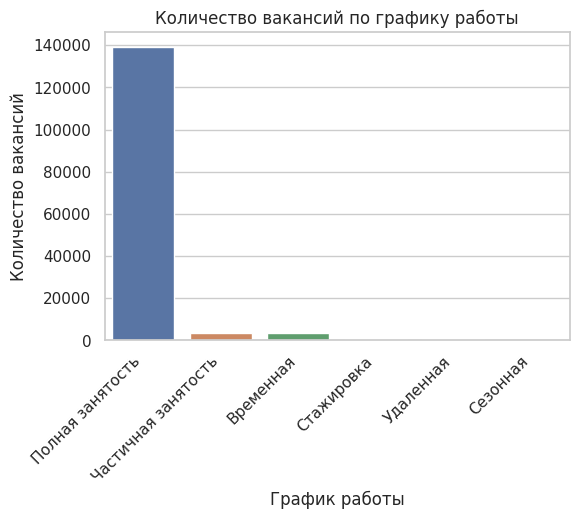

In [124]:
plt.figure(figsize=(6, 4))
sns.countplot(x='busy_type', data=df)
plt.title('Количество вакансий по графику работы')
plt.xlabel('График работы')
plt.ylabel('Количество вакансий')
plt.xticks(rotation=45, ha='right')
plt.show()

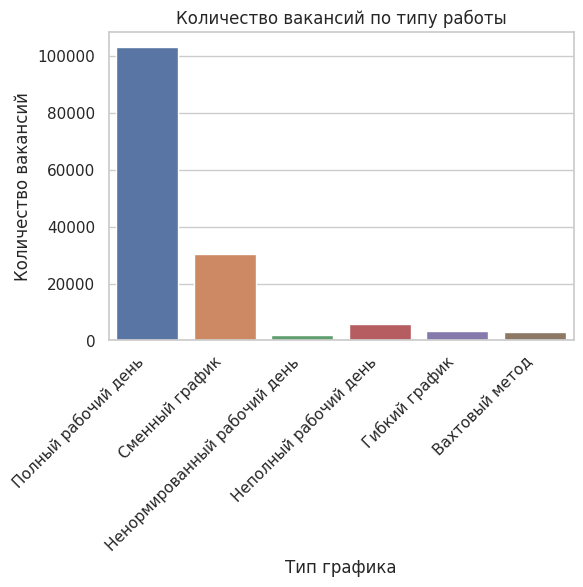

In [125]:
plt.figure(figsize=(6, 4))
sns.countplot(x='schedule_type', data=df)
plt.title('Количество вакансий по типу работы')
plt.xlabel('Тип графика')
plt.ylabel('Количество вакансий')
plt.xticks(rotation=45, ha='right')
plt.show()

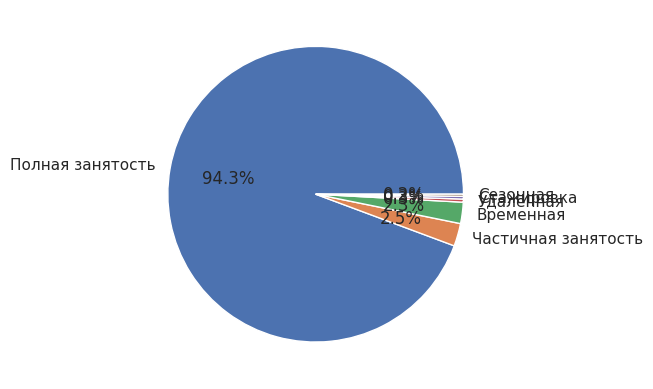

In [126]:
schedule_value_counts = df['busy_type'].value_counts()
plt.pie(schedule_value_counts, labels=schedule_value_counts.index, autopct='%1.1f%%')
plt.show()

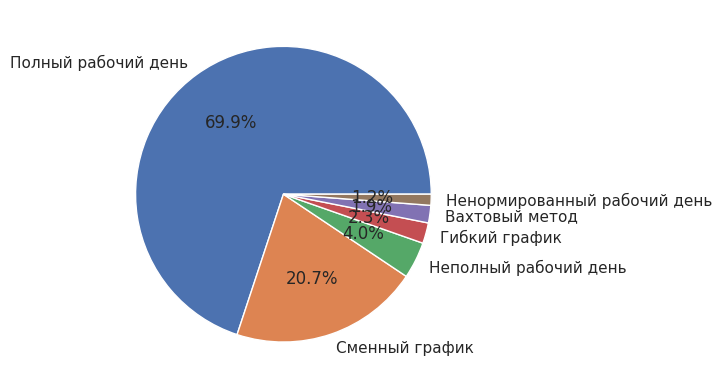

In [127]:
schedule_value_counts = df['schedule_type'].value_counts()
plt.pie(schedule_value_counts, labels=schedule_value_counts.index, autopct='%1.1f%%')
plt.show()

### **Вывод:**
 - Больше всего вакансий с полным рабочим днем. На втором месте - сменный график.

## 4. **Уровень образования** - education

In [128]:
df['education'].value_counts()

Не указано                  58327
Среднее профессиональное    38861
Высшее                      30584
Среднее                     18773
Среднее общее                 503
Незаконченное высшее          215
Основное общее                206
Name: education, dtype: int64

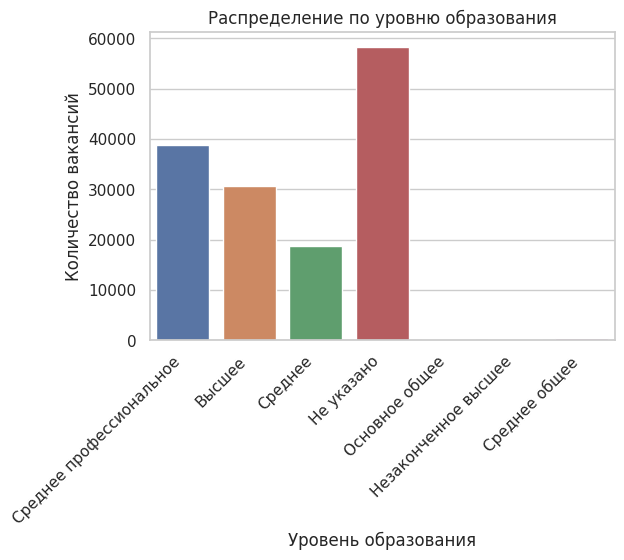

In [129]:
plt.figure(figsize=(6, 4))
sns.countplot(x='education', data=df)
plt.title('Распределение по уровню образования')
plt.xlabel('Уровень образования')
plt.ylabel('Количество вакансий')
plt.xticks(rotation=45, ha='right')
plt.show()

### **Вывод:**
Как видно большинству вакансий подходит любой уровень образования.



### Связь между образованием и зарплатой

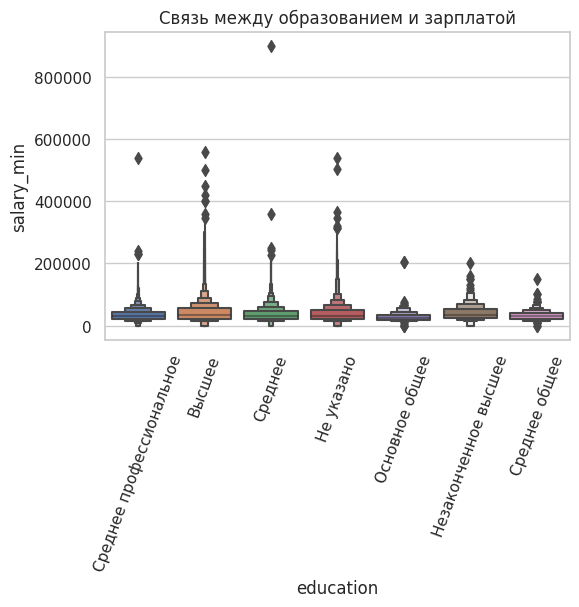

In [130]:
plt.figure(figsize=(6, 4))
sns.boxenplot(x='education', y='salary_min', data=df)
plt.title('Связь между образованием и зарплатой')
plt.xticks(rotation=70)
plt.show()

# 5. **Регионы** - regionName

In [131]:
region_counts = df['regionName'].value_counts()
print(region_counts)

Московская область               22742
Город Москва                     20409
Тульская область                 10687
Воронежская область               9777
Владимирская область              8956
Ярославская область               7931
Тверская область                  7091
Белгородская область              6930
Калужская область                 6668
Ивановская область                6621
Смоленская область                5697
Рязанская область                 5674
Брянская область                  5505
Липецкая область                  5380
Орловская область                 4814
Тамбовская область                4724
Курская область                   4008
Костромская область               3753
Боровлево-2 промышленная зона        8
Боровлево-1 промышленная зона        5
г. Москва                            4
Name: regionName, dtype: int64


### Количество уникальных регионов

In [132]:
print(f'Количество уникальных регионов: {len(df["regionName"].unique())}')

Количество уникальных регионов: 22


In [133]:
# Определяем порог для подписей (0.5% от общего количества)
threshold = 0.005 * len(df)

# Отбираем только те значения, где количество больше порога
annotated_region_ids = region_counts[region_counts > threshold].index

filtered_data = df[df['regionName'].isin(annotated_region_ids)]

print(f'Процент данных, который занимают следующие регионы: {list(annotated_region_ids)} равен {round(len(filtered_data)/len(df)*100)}%')

Процент данных, который занимают следующие регионы: ['Московская область', 'Город Москва', 'Тульская область', 'Воронежская область', 'Владимирская область', 'Ярославская область', 'Тверская область', 'Белгородская область', 'Калужская область', 'Ивановская область', 'Смоленская область', 'Рязанская область', 'Брянская область', 'Липецкая область', 'Орловская область', 'Тамбовская область', 'Курская область', 'Костромская область'] равен 100%


### **График**

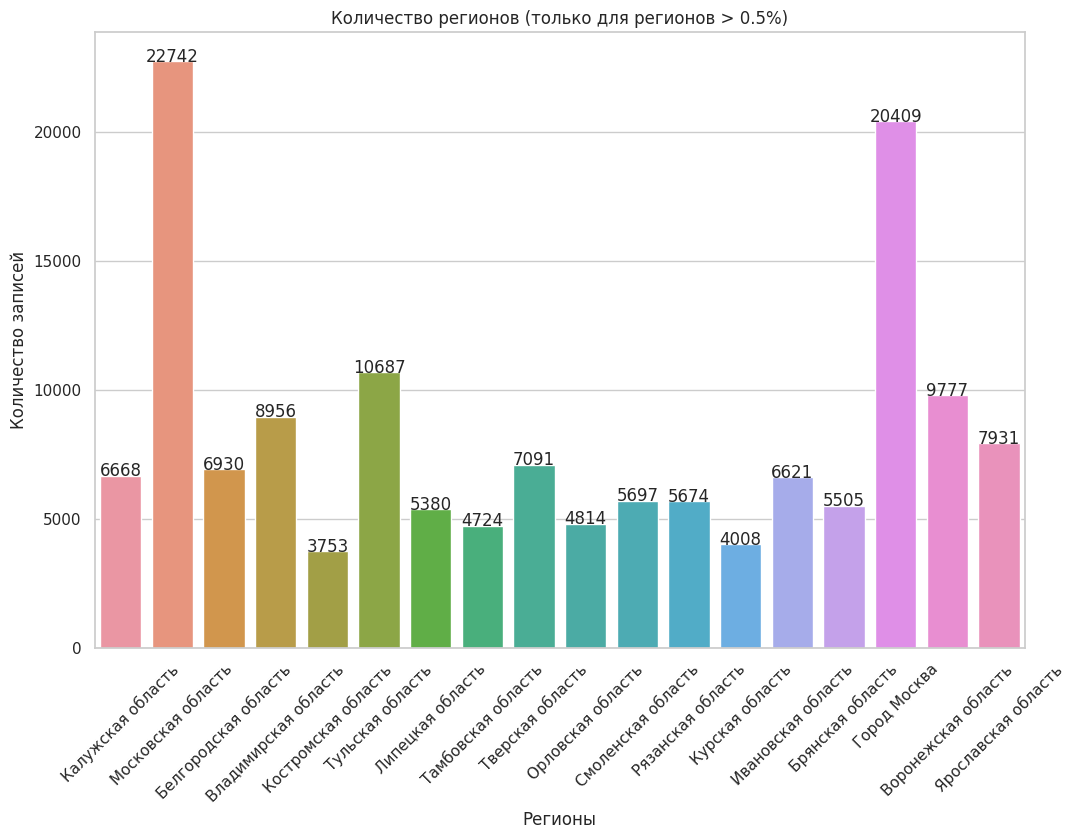

In [134]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='regionName', data=filtered_data)
plt.title('Количество регионов (только для регионов > 0.5%)')
plt.xlabel('Регионы')
plt.ylabel('Количество записей')

for p in ax.patches:
    if p.get_height() > threshold:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.xticks(rotation=45)
plt.show()

### **Гистограмма**

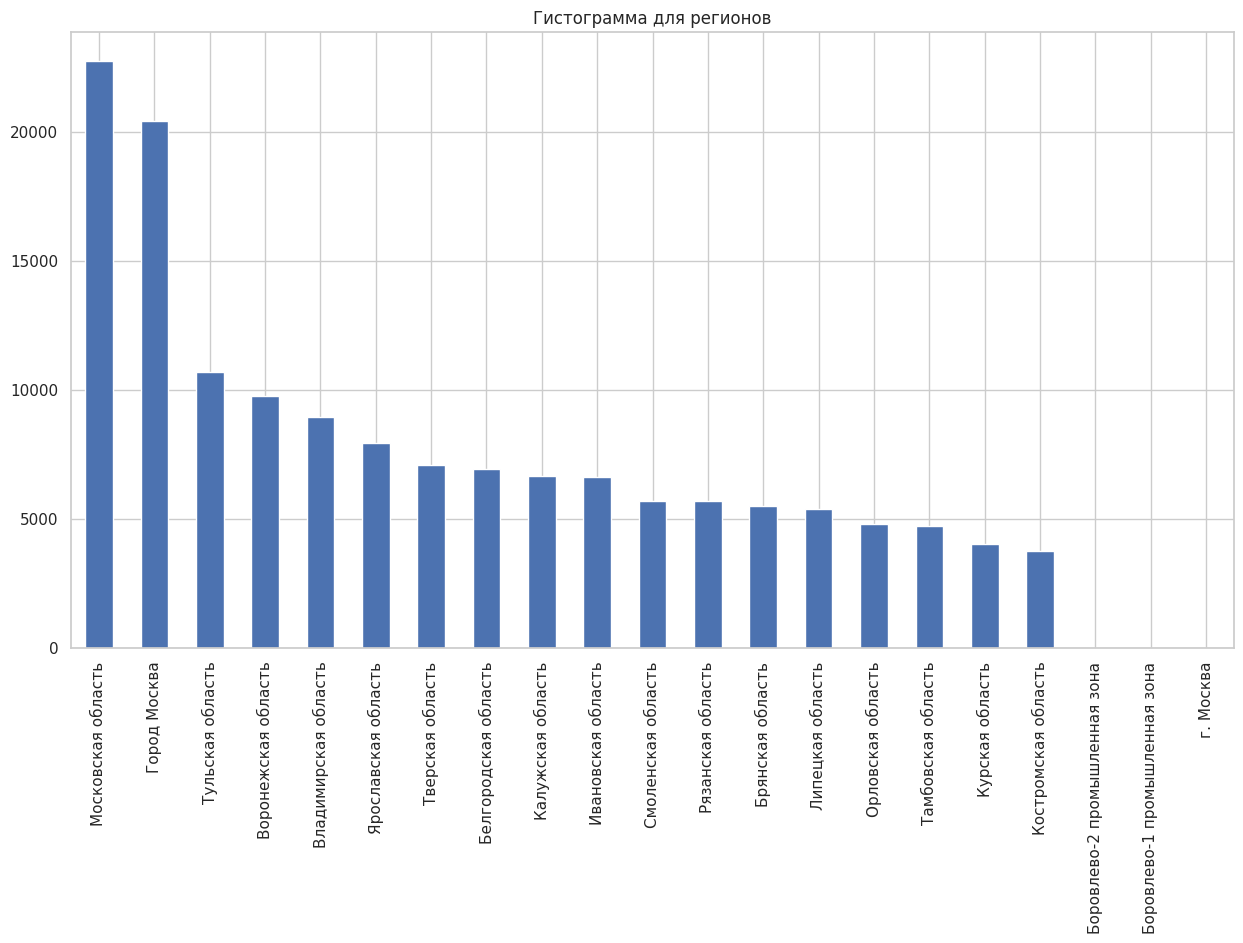

In [135]:
plt.figure(figsize=(15, 8))
df['regionName'].value_counts().plot(kind='bar', grid=True)
plt.title("Гистограмма для регионов")
plt.show()

## 6. **Требования к должности** - position_requirements

In [136]:
# Для начала надо заменить все NaN значения на текст. Например
df['position_requirements'] = df['position_requirements'].fillna("Не указано")

In [137]:
# Вывод нескольких ячеек для просмотра
for i in df['position_requirements'][:5]:
  print(i)
  print()

<p>Образование: фельдшер.</p>

<ul> <li>Основы математической теории и перспективных направлений развития современной математики</li> <li>Представление о широком спектре приложений математики и знание доступных обучающимся математических элементов этих приложений</li> <li></li> <li>Формировать у обучающихся убеждение в абсолютности математической истины и математического доказательства, предотвращать формирование модели поверхностной имитации действий, ведущих к успеху, без ясного понимания смысла; поощрять выбор различных путей в решении поставленной задачи</li> <li>Решать задачи элементарной математики соответствующей ступени образования, в том числе те новые, которые возникают в ходе работы с обучающимися, задачи олимпиад (включая новые задачи регионального этапа всероссийской олимпиады)</li> <li>Совместно с обучающимися применять методы и приемы понимания математического текста, его анализа, структуризации, реорганизации, трансформации</li> <li>Совместно с обучающимися проводить ан

### Фоматирование строк

In [138]:
def clean_text(text):
    cleaned_text = re.sub(r'[^а-яА-Я ]', '', str(text))
    return cleaned_text.strip()

In [139]:
df['position_requirements'] = df['position_requirements'].apply(clean_text)

In [140]:
# Вывод нескольких ячеек для просмотра
for i in df['position_requirements'][:5]:
  print(i)
  print()

Образование фельдшер

Основы математической теории и перспективных направлений развития современной математики Представление о широком спектре приложений математики и знание доступных обучающимся математических элементов этих приложений  Формировать у обучающихся убеждение в абсолютности математической истины и математического доказательства предотвращать формирование модели поверхностной имитации действий ведущих к успеху без ясного понимания смысла поощрять выбор различных путей в решении поставленной задачи Решать задачи элементарной математики соответствующей ступени образования в том числе те новые которые возникают в ходе работы с обучающимися задачи олимпиад включая новые задачи регионального этапа всероссийской олимпиады Совместно с обучающимися применять методы и приемы понимания математического текста его анализа структуризации реорганизации трансформации Совместно с обучающимися проводить анализ учебных и жизненных ситуаций в которых можно применить математический аппарат и 

## 7. **Должностные обязанности** - position_responsibilities

In [141]:
# Для начала надо заменить все NaN значения на текст. Например
df['position_responsibilities'] = df['position_responsibilities'].fillna("Не указано")

In [142]:
# Вывод нескольких ячеек для просмотра
for i in df['position_responsibilities'][:5]:
  print(i)
  print()

<p>Работа с обращениями персонала, проведение педрейсовых медосмотров</p>

<p></p> <ul> <li>Формирование конкретных знаний, умений и навыков в области математики и информатики</li> <li>Формирование внутренней (мысленной) модели математической ситуации (включая пространственный образ)</li> <li>Формирование у обучающихся умения проверять математическое доказательство, приводить опровергающий пример</li> <li>Формирование у обучающихся умения выделять подзадачи в задаче, перебирать возможные варианты объектов и действий</li> <li>Формирование у обучающихся умения пользоваться заданной математической моделью, в частности, формулой, геометрической конфигурацией, алгоритмом, оценивать возможный результат моделирования (например - вычисления)</li> <li>Формирование материальной и информационной образовательной среды, содействующей развитию математических способностей каждого ребенка и реализующей принципы современной педагогики</li> <li>Формирование у обучающихся умения применять средства информ

### Фоматирование строк

In [143]:
df['position_responsibilities'] = df['position_responsibilities'].apply(clean_text)

## 8. **Необходимый опыт** - required_experience

In [144]:
# Распределение зарплаты от
print(df['required_experience'].unique())


[ 5.  0.  1.  2.  3. nan 10.  4.  6.  7. 13. 22. 15.  8. 20. 12.  9. 11.
 30. 21.]


In [145]:
# Для начала надо заменить все NaN значения на текст. Например
df['required_experience'] = df['required_experience'].fillna(0)

In [146]:
# Распределение зарплаты от
print(df['required_experience'].unique())

[ 5.  0.  1.  2.  3. 10.  4.  6.  7. 13. 22. 15.  8. 20. 12.  9. 11. 30.
 21.]


### Изменение типа данных столбцов с float на int

In [147]:
# Изменение типа данных столбцов с float на int
df['required_experience'] = df['required_experience'].astype({'required_experience': int})

In [148]:
df['required_experience']

0         5
1         0
2         1
3         1
4         2
         ..
147464    0
147465    0
147466    0
147467    5
147468    1
Name: required_experience, Length: 147469, dtype: int64

## Количество вакансий в зависимости от опыта

In [149]:
df['required_experience'].value_counts()

0     98617
1     24154
3     14675
5      4481
2      3978
4       880
6       282
10      226
7        80
15       58
8        18
9         5
12        4
20        4
13        3
22        1
11        1
30        1
21        1
Name: required_experience, dtype: int64

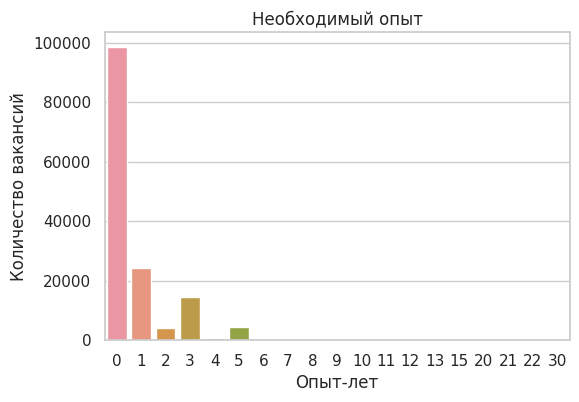

In [150]:
plt.figure(figsize=(6, 4))
sns.countplot(x='required_experience', data=df)
plt.title('Необходимый опыт')
plt.xlabel('Опыт-лет')
plt.ylabel('Количество вакансий')
plt.show()

### Связь между опытом и зарплатой

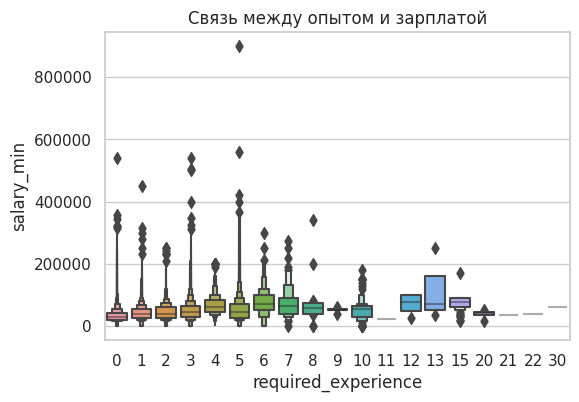

In [151]:
plt.figure(figsize=(6, 4))
sns.boxenplot(x='required_experience', y='salary_min', data=df)
plt.title('Связь между опытом и зарплатой')
plt.show()

## 10. **Название профессиональной сферы** - professionalSphereName

In [152]:
# Уникальные сферы
print(df['professionalSphereName'].unique())

['Здравоохранение и социальное обеспечение' 'Образование, наука'
 'Производство' 'Пищевая промышленность'
 'Государственная служба, некоммерческие организации'
 'Сельское хозяйство, экология, ветеринария' 'ЖКХ, эксплуатация'
 'Электроэнергетика' 'Металлургия, металлообработка'
 'Безопасность, службы охраны' 'Продажи, закупки, снабжение, торговля'
 'Рабочие специальности' 'Машиностроение' 'Юриспруденция'
 'Легкая промышленность'
 'Строительство, ремонт, стройматериалы, недвижимость'
 'Банки, кредит, страхование, пенсионное обеспечение'
 'Работы, не требующие квалификации' 'Спорт, фитнес, салоны красоты'
 'Транспорт, автобизнес, логистика, склад, ВЭД'
 'Административная работа, секретариат, АХО'
 'Информационные технологии, телекоммуникации, связь'
 'Туризм, гостиницы, рестораны' 'Бухгалтерия, налоги, управленческий учет'
 'Консалтинг, стратегическое развитие, управление'
 'Химическая, нефтехимическая, топливная промышленность'
 'Искусство, культура и развлечения'
 'Лесная, деревообрабат

### Количество сфер деятельности

In [153]:
df['professionalSphereName'].value_counts()

Производство                                                        27111
Здравоохранение и социальное обеспечение                            17353
Образование, наука                                                  11181
Продажи, закупки, снабжение, торговля                                9447
Транспорт, автобизнес, логистика, склад, ВЭД                         9168
ЖКХ, эксплуатация                                                    8074
Сельское хозяйство, экология, ветеринария                            5669
Пищевая промышленность                                               5104
Рабочие специальности                                                5004
Строительство, ремонт, стройматериалы, недвижимость                  4593
Работы, не требующие квалификации                                    4546
Машиностроение                                                       3866
Туризм, гостиницы, рестораны                                         3497
Государственная служба, некоммерческие

### Связь между сферой деятельности и зарплатой

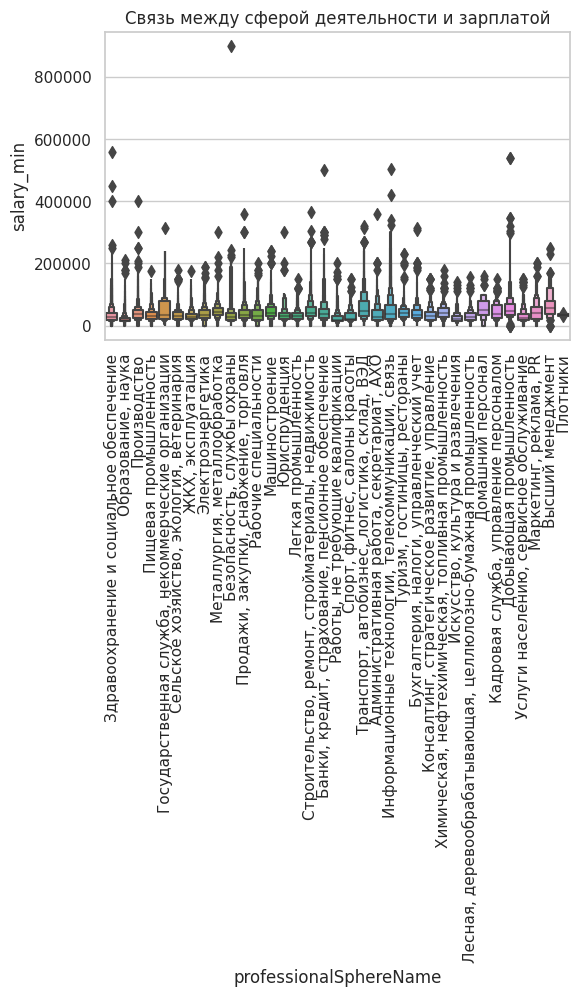

In [154]:
plt.figure(figsize=(6, 4))
sns.boxenplot(x='professionalSphereName', y='salary_min', data=df)
plt.title('Связь между сферой деятельности и зарплатой')
plt.xticks(rotation=90)
plt.show()

## **Столбцы**:
- languageKnowledge
- hardSkills
- softSkills
- required_drive_license


### Примеры содержания в этих столбцах

In [155]:
print(df.shape)
print('languageKnowledge:', (df['languageKnowledge'] != '[]').sum())
print('hardSkills:', (df['hardSkills'] != '[]').sum())
print('softSkills: ', (df['softSkills'] != '[]').sum())
print('required_drive_license: ', (df['required_drive_license'] != '[]').sum())

(147469, 18)
languageKnowledge: 6994
hardSkills: 9611
softSkills:  5031
required_drive_license:  7871


### Как выглядят заполненные ячейки:

In [156]:
df['required_drive_license'].unique()

array(['[]', '["C"]', '["D"]', '["B"]', '["B","D"]', '["B","C"]',
       '["C","E"]', '["B","C","D"]', '["B","D","C"]', '["B","C","E"]',
       '["B","C","D","E"]', '["C","D"]', '["A","B","C"]', '["C","D","E"]',
       '["C","B"]', '["B","D","C","E"]', '["E"]', '["A","B","C","D","E"]',
       '["A"]', '["E","C"]', '["D","C"]', '["B","E"]', '["B","E","C"]',
       '["E","C","B"]', '["B","E","C","D"]', '["D","E"]',
       '["C","A","B","D","E"]', '["C","B","D","E"]', '["B","C","E","D"]',
       '["D","B","C"]', '["C","B","D"]', '["D","B"]', '["A","B","C","D"]',
       '["C","D","B"]', '["E","C","D"]', '["B","A"]', '["D","C","B"]',
       '["B","D","E","A","C"]', '["E","D","B","C"]', '["D","C","E"]',
       '["B","D","E","C"]', '["E","D","C"]', '["B","E","A","D","C"]',
       '["E","A","B","C","D"]', '["C","D","B","A"]', '["A","C","D","B"]',
       '["D","E","B","C"]', '["A","B","D"]', '["D","E","C"]',
       '["B","C","D","A"]', '["A","B"]', '["B","C","E","A","D"]',
       '["B","E","D",

In [157]:
df['languageKnowledge'].unique()

array(['[]',
       '[{"code_language":"Русский","id_owner":"458875e6-029f-11ed-ae4f-d768660431c4","type":"LanguageKnowledge"}]',
       '[{"code_language":"Английский","id_owner":"441c0697-5eab-11ee-9738-cb26dff57dd7","level":"Способен пройти собеседование","type":"LanguageKnowledge"},{"code_language":"Русский","id_owner":"441c0697-5eab-11ee-9738-cb26dff57dd7","level":"Способен пройти собеседование","type":"LanguageKnowledge"}]',
       ...,
       '[{"code_language":"Русский","id_owner":"8a14cd10-62d1-11ee-97aa-e7d0d2cf29b1","level":"Родной","type":"LanguageKnowledge"}]',
       '[{"code_language":"Русский","id_owner":"88aaed96-66e5-11ec-83c4-4febb26dc4ec","type":"LanguageKnowledge"}]',
       '[{"code_language":"Английский","id_owner":"8473dae6-1f1a-11ee-aebb-0d972cff014f","level":"Свободный","type":"LanguageKnowledge"}]'],
      dtype=object)

In [158]:
df['hardSkills'].unique()

array(['[]',
       '[{"hard_skill_name":"умение работать в команде","owner_id":"46af2c65-8806-11ed-a1ee-17f530626801","type":"HardSkill"}]',
       '[{"hard_skill_name":"работа на производстве","owner_id":"43a86d18-f62f-11ec-98f4-d768660431c4","type":"HardSkill"},{"hard_skill_name":"пошив изделий","owner_id":"43a86d18-f62f-11ec-98f4-d768660431c4","type":"HardSkill"}]',
       ...,
       '[{"hard_skill_name":"работа с поставщиками","owner_id":"8879de98-8ebf-11ee-b33b-cb26dff57dd7","type":"HardSkill"},{"hard_skill_name":"учет первичной документации","owner_id":"8879de98-8ebf-11ee-b33b-cb26dff57dd7","type":"HardSkill"},{"hard_skill_name":"1с бухгалтерия","owner_id":"8879de98-8ebf-11ee-b33b-cb26dff57dd7","type":"HardSkill"},{"hard_skill_name":"excel","owner_id":"8879de98-8ebf-11ee-b33b-cb26dff57dd7","type":"HardSkill"}]',
       '[{"hard_skill_name":"профессионализм","owner_id":"864735c5-374c-11ee-99f9-0d972cff014f","type":"HardSkill"}]',
       '[{"hard_skill_name":"чтение чертежей","ow

In [159]:
df['softSkills'].unique()

array(['[]',
       '[{"owner_id":"45b03d15-098d-11ed-9fa4-57fc951f3846","soft_skill_name":"Ответственность","type":"SoftSkill"},{"owner_id":"45b03d15-098d-11ed-9fa4-57fc951f3846","soft_skill_name":"Работоспособность","type":"SoftSkill"}]',
       '[{"owner_id":"43a86d18-f62f-11ec-98f4-d768660431c4","soft_skill_name":"Аккуратность","type":"SoftSkill"},{"owner_id":"43a86d18-f62f-11ec-98f4-d768660431c4","soft_skill_name":"Исполнительность","type":"SoftSkill"},{"owner_id":"43a86d18-f62f-11ec-98f4-d768660431c4","soft_skill_name":"Ответственность","type":"SoftSkill"}]',
       ...,
       '[{"owner_id":"8879de98-8ebf-11ee-b33b-cb26dff57dd7","soft_skill_name":"Коммуникабельность","type":"SoftSkill"},{"owner_id":"8879de98-8ebf-11ee-b33b-cb26dff57dd7","soft_skill_name":"Нацеленность на результат","type":"SoftSkill"},{"owner_id":"8879de98-8ebf-11ee-b33b-cb26dff57dd7","soft_skill_name":"Умение анализировать большие объемы информации","type":"SoftSkill"}]',
       '[{"owner_id":"864735c5-374c-11e

### Очистка строк

In [160]:
# Функция для очистки строки столбца languageKnowledge
def clean_string_language(s):
    match = re.findall(r'(?<=code_language":")[А-Яа-я]+', s)
    return ', '.join(match)

In [161]:
# Функция для очистки строки столбца hardSkills
def clean_string_hardSkills(s):
    match = re.findall(r'(?<=hard_skill_name":")[А-Яа-я]+', s)
    return ', '.join(match)

In [162]:
# Функция для очистки строки столбца softSkills
def clean_string_softSkills(s):
    match = re.findall(r'(?<=soft_skill_name":")[А-Яа-я]+', s)
    return ', '.join(match)

In [163]:
df['languageKnowledge'] = df['languageKnowledge'].apply(clean_string_language)
df['hardSkills'] = df['hardSkills'].apply(clean_string_hardSkills)
df['softSkills'] = df['softSkills'].apply(clean_string_softSkills)

### Преобработка данных

In [164]:
# Замена значений '[]' на 'Не задано' в указанных столбцах
columns_to_replace = ['languageKnowledge', 'hardSkills', 'softSkills']
df[columns_to_replace] = df[columns_to_replace].replace('', 'Не задано')
df['required_drive_license'] = df['required_drive_license'].replace('[]', 'Не задано')
df.drop('salary_diff', axis=1, inplace=True)

In [165]:
df['languageKnowledge'].unique()

array(['Не задано', 'Русский', 'Английский, Русский', 'Английский',
       'Русский, Английский', 'Китайский, Английский',
       'Английский, Немецкий', 'Английский, Китайский', 'Вьетнамский',
       'Немецкий, Английский', 'Корейский',
       'Русский, Английский, Немецкий', 'Китайский',
       'Английский, Русский, Китайский',
       'Английский, Русский, Вьетнамский',
       'Русский, Вьетнамский, Английский', 'Английский, Испанский',
       'Английский, Арабский, Испанский', 'Английский, Турецкий',
       'Немецкий', 'Турецкий, Английский', 'Грузинский',
       'Немецкий, Китайский, Английский',
       'Китайский, Русский, Английский', 'Турецкий, Русский',
       'Русский, Французский, Английский', 'Турецкий', 'Испанский',
       'Русский, Английский, Китайский, Вьетнамский',
       'Английский, Персидский, Арабский, Русский',
       'Русский, Вьетнамский', 'Английский, Вьетнамский',
       'Французский, Английский', 'Татский, Английский',
       'Сербскохорватский', 'Китайский, Р

In [166]:
df['hardSkills'].unique()

array(['Не задано', 'умение', 'работа, пошив', ...,
       'готовность, коммуникабельность, отсутствие, умение',
       'использование, обслуживание, ответственность', 'работа, учет'],
      dtype=object)

In [167]:
df['softSkills'].unique()

array(['Не задано', 'Ответственность, Работоспособность',
       'Аккуратность, Исполнительность, Ответственность', ...,
       'Коммуникабельность, Работа, Внимательность',
       'Коммуникабельность, Быстрая, Аккуратность',
       'Быстрая, Обучаемость'], dtype=object)

# **Предобработка и очистка данных**

In [169]:
# Пример данных
n = 0 # Берем первое резюме
for i in range(len(df.values[n])): # Выводим значение каждой графы резюме
  print(i, " ", df.values[n][i])

0   Полная занятость
1   Среднее профессиональное
2   Образование фельдшер
3   Работа с обращениями персонала проведение педрейсовых медосмотров
4   Калужская область
5   Не задано
6   5
7   27000.0
8   27000.0
9   Полный рабочий день
10   4000000000000
11   Калужская область, Бабынинский район, Воротынск поселок, Промышленная улица, 3
12   Фельдшер
13   Здравоохранение и социальное обеспечение
14   Не задано
15   Не задано
16   Не задано


## **Преобразование данных в численное значение**

#### Образования - **education**

In [170]:
le_edname = LabelEncoder()
le_edname.fit(df['education'])

df['education'] = le_edname.transform(df['education'])

#### **Тип занятости** - busy_type и schedule_type

In [171]:
le_busy_type = LabelEncoder()
le_busy_type.fit(df['busy_type'])

df['busy_type'] = le_busy_type.transform(df['busy_type'])

In [172]:
le_schedule_type = LabelEncoder()
le_schedule_type.fit(df['schedule_type'])

df['schedule_type'] = le_schedule_type.transform(df['schedule_type'])

### Таблица с конвертированными данными

In [173]:
df[['education','busy_type', 'schedule_type']].head()

,education,busy_type,schedule_type
0,6,1,4
1,0,1,4
2,4,1,4
3,6,1,4
4,0,1,4


## Преобразование значений в столбце **state_region_code**

In [174]:
df['state_region_code']

0         4000000000000
1         5000000000000
2         5000000000000
3         4000000000000
4         5000000000000
              ...      
147464    5000000000000
147465    6800000000000
147466    6200000000000
147467    7700000000000
147468    5700000000000
Name: state_region_code, Length: 147469, dtype: int64

In [175]:
# Преобразование значений в столбце
df['state_region_code'] = df['state_region_code'].astype(str).str.lstrip('0').str[:2].astype(int)

In [176]:
df['state_region_code']

0         40
1         50
2         50
3         40
4         50
          ..
147464    50
147465    68
147466    62
147467    77
147468    57
Name: state_region_code, Length: 147469, dtype: int64

# Итоговая таблица

In [178]:
df.head(10)

,busy_type,education,position_requirements,position_responsibilities,regionName,required_drive_license,required_experience,salary_min,salary_max,schedule_type,state_region_code,vacancy_address,vacancy_name,professionalSphereName,languageKnowledge,hardSkills,softSkills
0,1,6,Образование фельдшер,Работа с обращениями персонала проведение педр...,Калужская область,Не задано,5,27000.000,27000.000,4,40,"Калужская область, Бабынинский район, Воротынс...",Фельдшер,Здравоохранение и социальное обеспечение,Не задано,Не задано,Не задано
1,1,0,Основы математической теории и перспективных н...,Формирование конкретных знаний умений и навыко...,Московская область,Не задано,0,40000.000,60000.000,4,50,"Московская область, Город Серпухов, Липицы сел...",Учитель,"Образование, наука",Не задано,Не задано,Не задано
2,1,4,Опыт работы на производстве будет являться пре...,Выполнение операций согласно производственному...,Московская область,Не задано,1,58000.000,78000.000,4,50,"Московская область, Город Мытищи, Проектируемы...",Оператор производственной линии,Производство,Не задано,Не задано,Не задано
3,1,6,Для трудоустройства инвалида группы в соответ...,Знать рецептуру технологию приготовления блюд ...,Калужская область,Не задано,1,16250.000,0.000,4,40,"Калужская область, Город Калуга, Воронина улиц...",Повар,Пищевая промышленность,Не задано,Не задано,Не задано
4,1,0,Юрисконсульт должен знать требования законо...,Юрисконсульт должен обладать следующими базовы...,Московская область,Не задано,2,40000.000,50000.000,4,50,"Московская область, Город Жуковский, Фрунзе ул...",Специалист в сфере закупок,"Государственная служба, некоммерческие организ...",Не задано,Не задано,Не задано
5,1,0,Высшее педагогическое образование опыт работы...,Проводит психопрофилактическую диагностическую...,Белгородская область,Не задано,0,20000.000,0.000,5,31,Белгородская область,Педагог-психолог,"Образование, наука",Не задано,Не задано,Не задано
6,1,1,Ответствекнность дисциплинированность,Выполняет плотничьи работы в требуемом объеме ...,Владимирская область,Не задано,0,45000.000,0.000,4,33,"Владимирская область, Ковровский район, Первом...",плотник,"Сельское хозяйство, экология, ветеринария",Не задано,Не задано,Не задано
7,1,4,Внимательность пунктуальность ответственность ...,Ведение процесса обработки тушек птицы обслужи...,Костромская область,Не задано,0,40000.000,0.000,4,44,Костромская область,Обработчик птицы,"Сельское хозяйство, экология, ветеринария",Не задано,Не задано,Не задано
8,1,0,Не привлекавшиеся к уголовной ответственности ...,Обеспечение исправления спецконтингента подгот...,Владимирская область,Не задано,0,35000.000,45000.000,5,33,"Владимирская область, Вязниковский район, Горо...",Начальник отряда,"Государственная служба, некоммерческие организ...",Не задано,Не задано,Не задано
9,1,4,Водительское удостоверение категории С Ответст...,Обеспечение целостной и своевременной перевозк...,Тульская область,Не задано,0,30000.000,0.000,4,71,"Тульская область, Город Тула, Менделеевский по...",водитель автомобиля,"ЖКХ, эксплуатация",Не задано,Не задано,Не задано
